<a href="https://colab.research.google.com/github/elisaramoss/curso-git-github/blob/master/Data_Visualization_Elisa_Ramos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercício Prático - Data Visualization

###Desafio Prático 1: Visualizando Dados Diferentes
Descrição: Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando
Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos
dados, correlações entre variáveis e tendências.


In [ ]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#1. Carregar os dados de um arquivo CSV fornecido (saude.csv).

url = 'https://raw.githubusercontent.com/elisaramoss/projetos-bootcamp/main/saude.csv'
df = pd.read_csv(url)

df

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M
5,6,40,170,75,F
6,7,29,155,60,F
7,8,50,160,85,M
8,9,38,175,78,F
9,10,28,168,68,M


<function matplotlib.pyplot.show(close=None, block=None)>

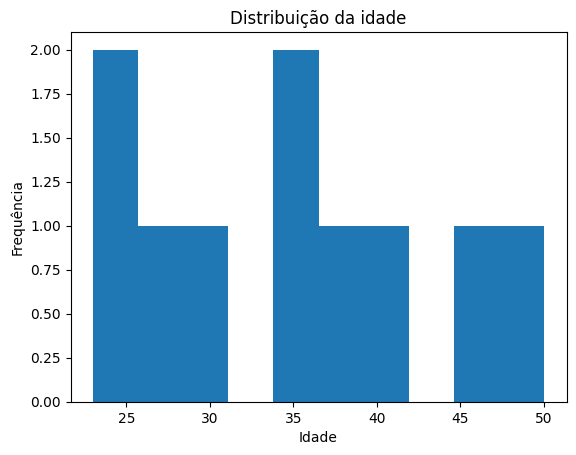

In [ ]:
#2. Criar um histograma da variável 'age' usando Matplotlib.

plt.hist(df['age'])
plt.title('Distribuição da idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show

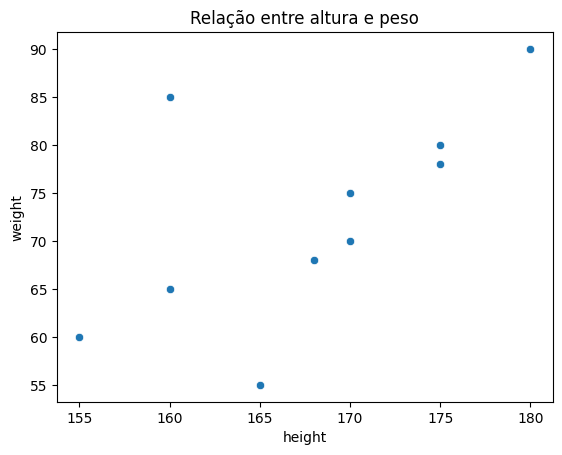

In [ ]:
#3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando Seaborn.

sns.scatterplot(x='height', y='weight', data=df)
plt.title('Relação entre altura e peso')
plt.show()


In [ ]:
#4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por 'gender' usando Plotly.
# Contar o número de indivíduos por gênero
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Criar o gráfico de barras interativo com cores diferentes para cada gênero
fig = px.bar(gender_counts, x='gender', y='count', color='gender', title='Contagem de Indivíduos por Gênero', labels={'gender': 'Gênero', 'count': 'Contagem'})

# Ajustar o tamanho da figura
fig.update_layout(width=600, height=400)
# Mostrar o gráfico
fig.show()

###Desafio Prático 2: Séries Temporais
Descrição: Neste desafio, suas alunas irão analisar uma série temporal de dados de
vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar
tendências e sazonalidades.

In [ ]:
#1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).

url = "https://raw.githubusercontent.com/elisaramoss/projetos-bootcamp/main/vendas.csv"

df = pd.read_csv(url)

df.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


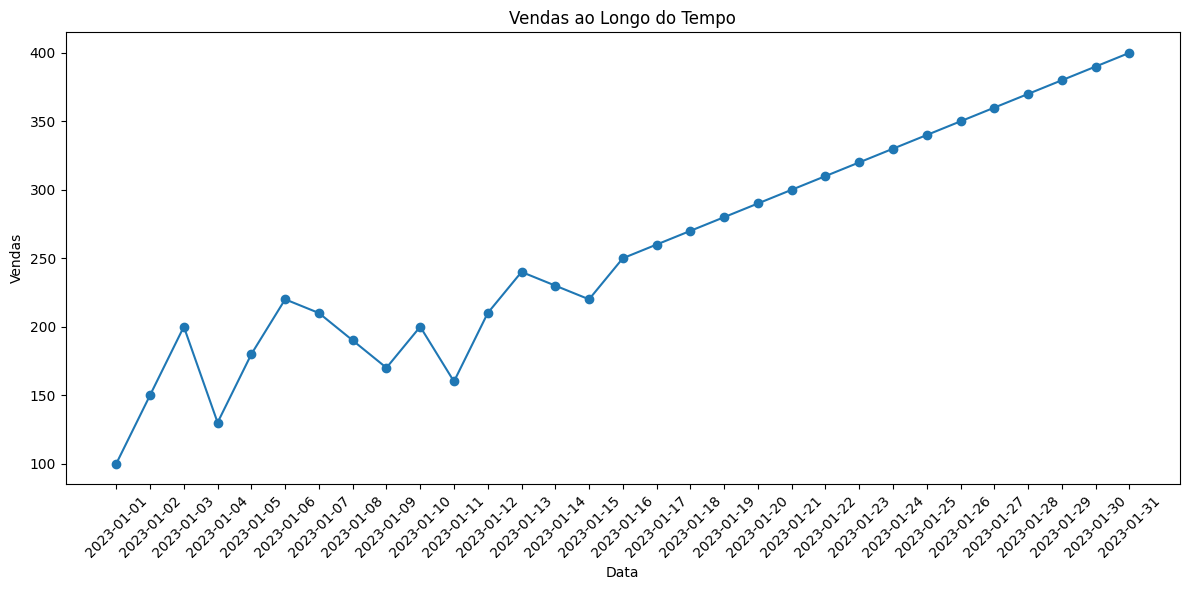

In [ ]:
#2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.

plt.figure(figsize=(12, 6))

# Criar o gráfico de linhas
plt.plot(df['date'], df['sales'], marker='o')

# Adicionar título e rótulos
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')

# Rotacionar as etiquetas do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

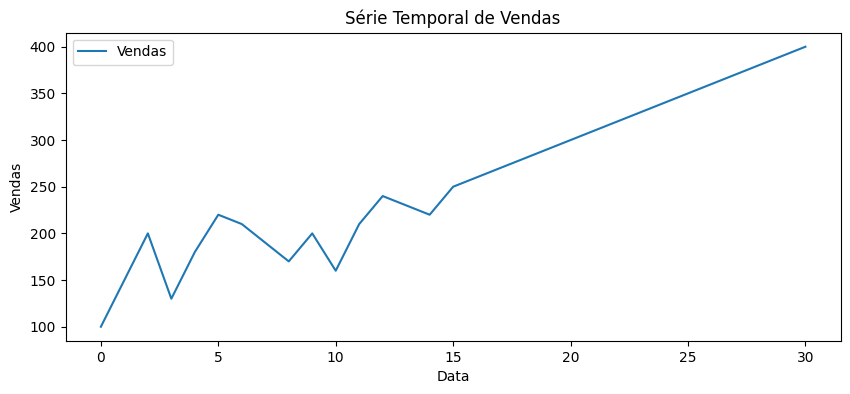

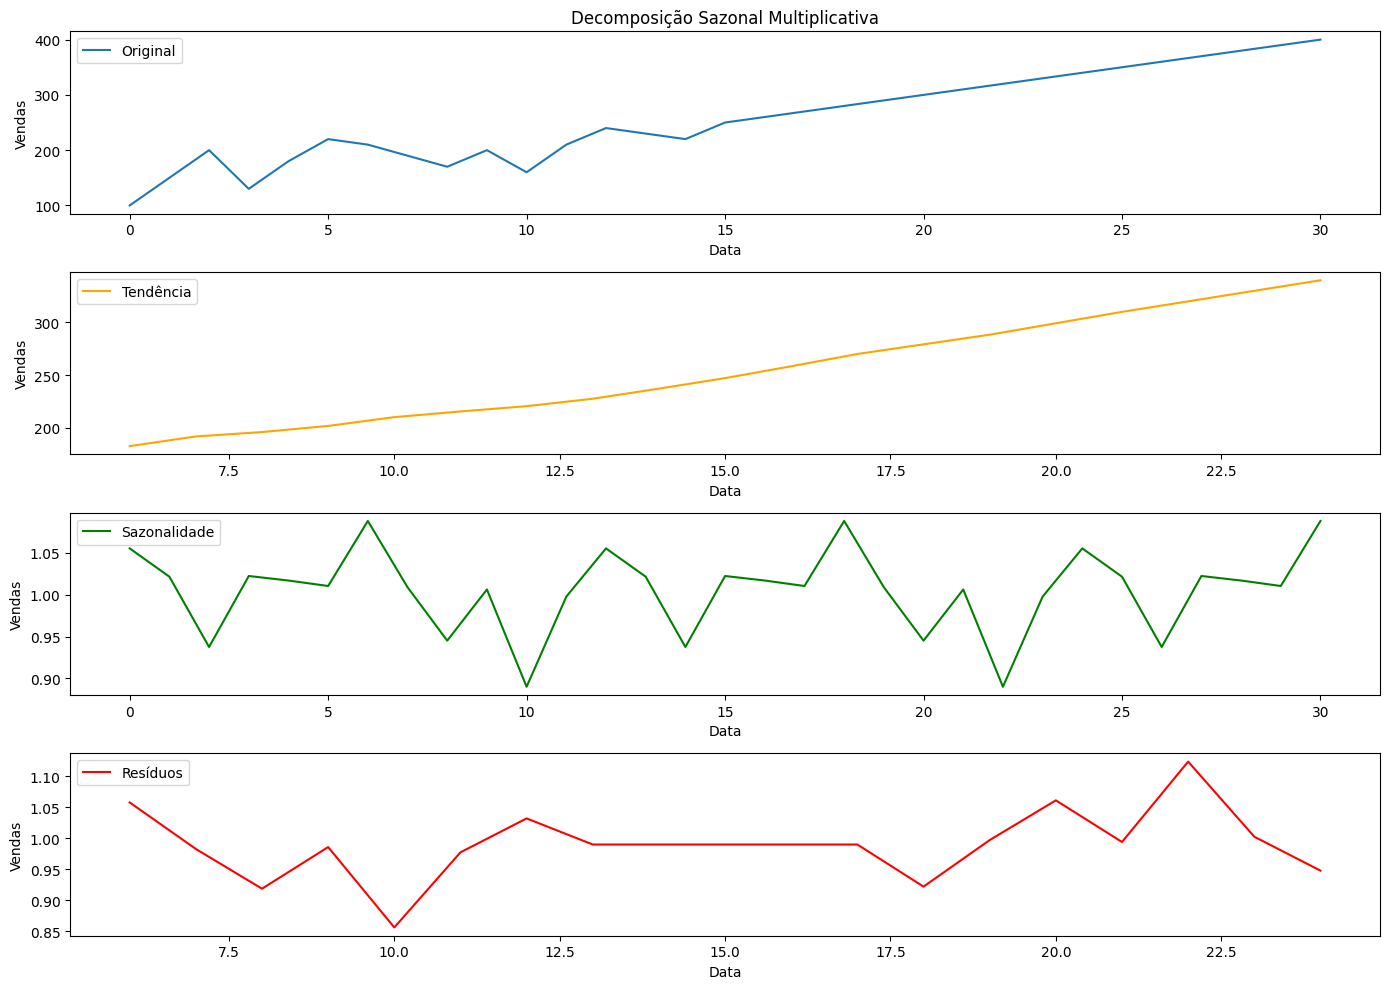

In [ ]:

#3. Criar um gráfico de decomposição sazonal usando Seaborn.import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Visualizar a série temporal
plt.figure(figsize=(10, 4))
plt.plot(df['sales'], label='Vendas')
plt.title('Série Temporal de Vendas')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.show()

# Decomposição multiplicativa
result_mul = seasonal_decompose(df['sales'], model='multiplicative', period=12)

# Plotar a decomposição multiplicativa
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(result_mul.observed, label='Original')
plt.legend(loc='upper left')
plt.title('Decomposição Sazonal Multiplicativa')
plt.xlabel('Data')
plt.ylabel('Vendas')

plt.subplot(4, 1, 2)
plt.plot(result_mul.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Vendas')

plt.subplot(4, 1, 3)
plt.plot(result_mul.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Vendas')

plt.subplot(4, 1, 4)
plt.plot(result_mul.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Vendas')

plt.tight_layout()
plt.show()


In [ ]:
#4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo do tempo usando Plotly

# Criar o gráfico de linhas interativo
fig = px.line(df, x='date', y='sales', title='Vendas ao Longo do Tempo', labels={'date': 'Data', 'sales': 'Vendas'})

# Adicionar interatividade
fig.update_traces(mode='lines+markers')
fig.update_layout(
    xaxis_title='Data',
    yaxis_title='Vendas',
    hovermode='x unified'
)

# Mostrar o gráfico
fig.show()